<a href="https://colab.research.google.com/github/choius0528/Machine-Learning_Study/blob/main/9%EC%A3%BC%EC%B0%A8/RNN_LSTM_w9_Alcohol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#RNN 예측 모델 학습 Alcohol_Sales.csv

In [2]:
import numpy as np, pandas as pd, tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

#데이터 불러오기
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Alcohol_Sales.csv')
data = df['S4248SM144NCEN'].values.reshape(-1,1)

df

,DATE,S4248SM144NCEN
0,1992-01-01,3459
1,1992-02-01,3458
2,1992-03-01,4002
3,1992-04-01,4564
4,1992-05-01,4221
...,...,...
320,2018-09-01,12396
321,2018-10-01,13914
322,2018-11-01,14174
323,2018-12-01,15504


In [3]:
data

array([[ 3459],
       [ 3458],
       [ 4002],
       [ 4564],
       [ 4221],
       [ 4529],
       [ 4466],
       [ 4137],
       [ 4126],
       [ 4259],
       [ 4240],
       [ 4936],
       [ 3031],
       [ 3261],
       [ 4160],
       [ 4377],
       [ 4307],
       [ 4696],
       [ 4458],
       [ 4457],
       [ 4364],
       [ 4236],
       [ 4500],
       [ 4974],
       [ 3075],
       [ 3377],
       [ 4443],
       [ 4261],
       [ 4460],
       [ 4985],
       [ 4324],
       [ 4719],
       [ 4374],
       [ 4248],
       [ 4784],
       [ 4971],
       [ 3370],
       [ 3484],
       [ 4269],
       [ 3994],
       [ 4715],
       [ 4974],
       [ 4223],
       [ 5000],
       [ 4235],
       [ 4554],
       [ 4851],
       [ 4826],
       [ 3699],
       [ 3983],
       [ 4262],
       [ 4619],
       [ 5219],
       [ 4836],
       [ 4941],
       [ 5062],
       [ 4365],
       [ 5012],
       [ 4850],
       [ 5097],
       [ 3758],
       [ 3825],
       [

In [4]:
#데이터 전처리 (정규화)
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

data

array([[0.03431412],
       [0.03423395],
       [0.07784815],
       [0.12290548],
       [0.09540608],
       [0.12009941],
       [0.1150485 ],
       [0.08867153],
       [0.08778963],
       [0.09845266],
       [0.09692937],
       [0.1527299 ],
       [0.        ],
       [0.01843983],
       [0.09051551],
       [0.10791309],
       [0.10230097],
       [0.13348833],
       [0.11440712],
       [0.11432695],
       [0.10687084],
       [0.09660867],
       [0.11777439],
       [0.15577648],
       [0.00352762],
       [0.02773992],
       [0.11320452],
       [0.098613  ],
       [0.11456747],
       [0.15665838],
       [0.10366391],
       [0.13533232],
       [0.10767257],
       [0.09757075],
       [0.14054357],
       [0.15553596],
       [0.02717871],
       [0.03631845],
       [0.09925439],
       [0.07720677],
       [0.13501163],
       [0.15577648],
       [0.09556642],
       [0.15786098],
       [0.0965285 ],
       [0.12210374],
       [0.14591518],
       [0.143

In [5]:
#시퀀스 생성
window = 12   # 최근 12개월 → 다음달 예측

X, y = [], []

for i in range(len(data)-window):
    X.append(data[i:i+window])
    y.append(data[i+window])

X, y = np.array(X), np.array(y)

In [6]:
#학습 & 예측(train & test) 데이터 나누기

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('train: ', X_train.shape, y_train.shape)
print('test: ', X_test.shape, y_test.shape)

train:  (250, 12, 1) (250, 1)
test:  (63, 12, 1) (63, 1)


In [7]:
#RNN 모델
model_rnn = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(64, return_sequences=True, input_shape=(window,1)),
    tf.keras.layers.SimpleRNN(32),
    tf.keras.layers.Dense(1)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
#모델 컴파일
model_rnn.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [9]:
#모델 학습
history = model_rnn.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

Epoch 1/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - loss: 0.1636 - mae: 0.3090 - val_loss: 0.0351 - val_mae: 0.1556
Epoch 2/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0325 - mae: 0.1530 - val_loss: 0.0205 - val_mae: 0.1065
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0186 - mae: 0.1074 - val_loss: 0.0176 - val_mae: 0.1056
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0096 - mae: 0.0747 - val_loss: 0.0162 - val_mae: 0.0943
Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0084 - mae: 0.0714 - val_loss: 0.0143 - val_mae: 0.1008
Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0074 - mae: 0.0700 - val_loss: 0.0127 - val_mae: 0.0833
Epoch 7/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0057 - mae: 0.0572 - val_loss: 0.0109 - val_mae: 0.0850
Epoch 8/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0058 - mae: 0.0592 - val_loss: 0.0109 - val_mae: 0.0765
Epoch 9/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0051 - mae: 0.0546 - 

In [10]:
#테스트 데이터 예측
y_pred = model_rnn.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


In [11]:
#MSE 계산
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')

MSE: 0.0022326034606521225


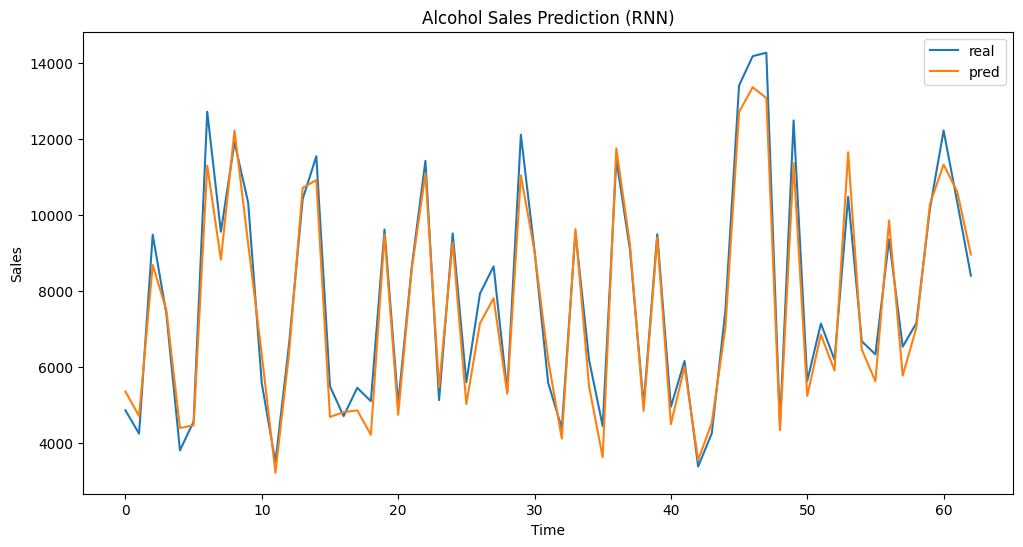

In [12]:
#예측 결과 시각화
y_test_inv = scaler.inverse_transform(y_test)
y_pred_inv = scaler.inverse_transform(y_pred)

plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label='real')
plt.plot(y_pred_inv, label='pred')
plt.title('Alcohol Sales Prediction (RNN)')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()

#LSTM 모델 사용하여 추가 진행

In [13]:
#LSTM 모델
model_lstm = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, return_sequences=True, input_shape=(window,1)),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(1)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
#모델 컴파일
model_lstm.compile(optimizer='adam', loss='mse')

In [15]:
#모델 학습
history = model_lstm.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

Epoch 1/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - loss: 0.1634 - val_loss: 0.0227
Epoch 2/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0150 - val_loss: 0.0328
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0196 - val_loss: 0.0152
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0113 - val_loss: 0.0151
Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0090 - val_loss: 0.0137
Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0082 - val_loss: 0.0125
Epoch 7/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0064 - val_loss: 0.0119
Epoch 8/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0066 - val_loss: 0.0112
Epoch 9/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0058 - val_loss: 0.0122
Epoch 10/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0060 - val_loss: 0.0111
Epoch 11/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0062 - val_loss: 0.0111
Epoch 12/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0060 - val_loss: 0.0116
E

In [16]:
#테스트 데이터 예측
y_pred = model_lstm.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 358ms/step


In [17]:
#MSE 계산
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')

MSE: 0.0051830936106297635


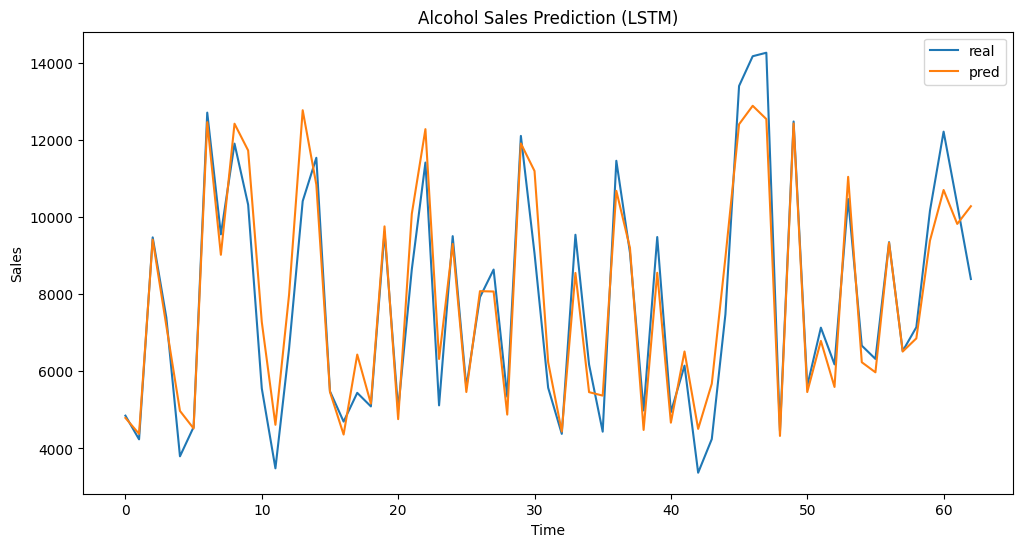

In [18]:
#예측 결과 시각화
y_test_inv = scaler.inverse_transform(y_test)
y_pred_inv = scaler.inverse_transform(y_pred)

plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label='real')
plt.plot(y_pred_inv, label='pred')
plt.title('Alcohol Sales Prediction (LSTM)')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()